In [2]:
# Download libraries

!pip3 install pandas numpy seaborn wordcloud nltk matplotlib spacy

# Download list of stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Import important libraries

import numpy as np              # Number-parsing library
import pandas as pd             # Useful for handling large amounts of data
import seaborn as sns           # Helpful in visualizing large amounts of data
import matplotlib.pyplot as plt # General use plotting program
import spacy                    # Visualize different parts of speech

# Use this style with matplotlib
plt.style.use('ggplot')

# Start by loading spacy
# Get English pipeline optimized for the CPU
!pip3 install click --upgrade
!python3 -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

# Use for NLP(Natural Language Processing)
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Use to split by multiple delimiters
import re

import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/html1011/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/html1011/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/html1011/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Requirement already up-to-date: click in /home/html1011/.local/lib/python3.8/site-packages (8.0.3)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Time to fetch the Wild text!
# Simply read the text + split by newlines/spaces/periods/commas, lowercase, then remove empty words
# 1) Read the text
contents = open("Wild_text.txt", "r").read().replace("\n", " ")
contents_clean = list(filter(lambda x: x != "", re.split("[\n .,]", contents)))

# Now store contents split up by sentences
content_sentences = list(filter(lambda x: x != "", re.split("[!?.]", contents)))

# Print the first 100 words of the text
print(contents_clean[:100])

# Print the last 5 sentences
print(content_sentences[-6:-1])

['To', 'write', 'this', 'book', 'I', 'relied', 'upon', 'my', 'personal', 'journals', 'researched', 'facts', 'when', 'I', 'could', 'consulted', 'with', 'several', 'of', 'the', 'people', 'who', 'appear', 'in', 'the', 'book', 'and', 'called', 'upon', 'my', 'own', 'memory', 'of', 'these', 'events', 'and', 'this', 'time', 'of', 'my', 'life', 'I', 'have', 'changed', 'the', 'names', 'of', 'most', 'but', 'not', 'all', 'of', 'the', 'individuals', 'in', 'this', 'book', 'and', 'in', 'some', 'cases', 'I', 'also', 'modi!ed', 'identifying', 'details', 'in', 'order', 'to', 'preserve', 'anonymity', 'There', 'are', 'no', 'composite', 'characters', 'or', 'events', 'in', 'this', 'book', 'I', 'occasionally', 'omitted', 'people', 'and', 'events', 'but', 'only', 'when', 'that', 'omission', 'had', 'no', 'impact', 'on', 'either', 'the', 'veracity', 'or']
[' Her stories and essays have appeared in numerous magazines and journals, including The New York Times Magazine, The Washington Post Magazine, Allure, The 

In [4]:
# Create functions to remove stopwords
def removeStopwords(text):
    stop_words = set(stopwords.words("english"))# Get list of stopwords from nltk
    words = word_tokenize(text.lower()) # Convert text to lowercase and get the words in the text

    sentence = list(filter(lambda x: not x in stop_words, words)) # Filter through words
    return " ".join(sentence)

# Print out the first 100 stop words
stop_words = removeStopwords(" ".join(contents_clean))
print(stop_words[:100])

write book relied upon personal journals researched facts could consulted several people appear book


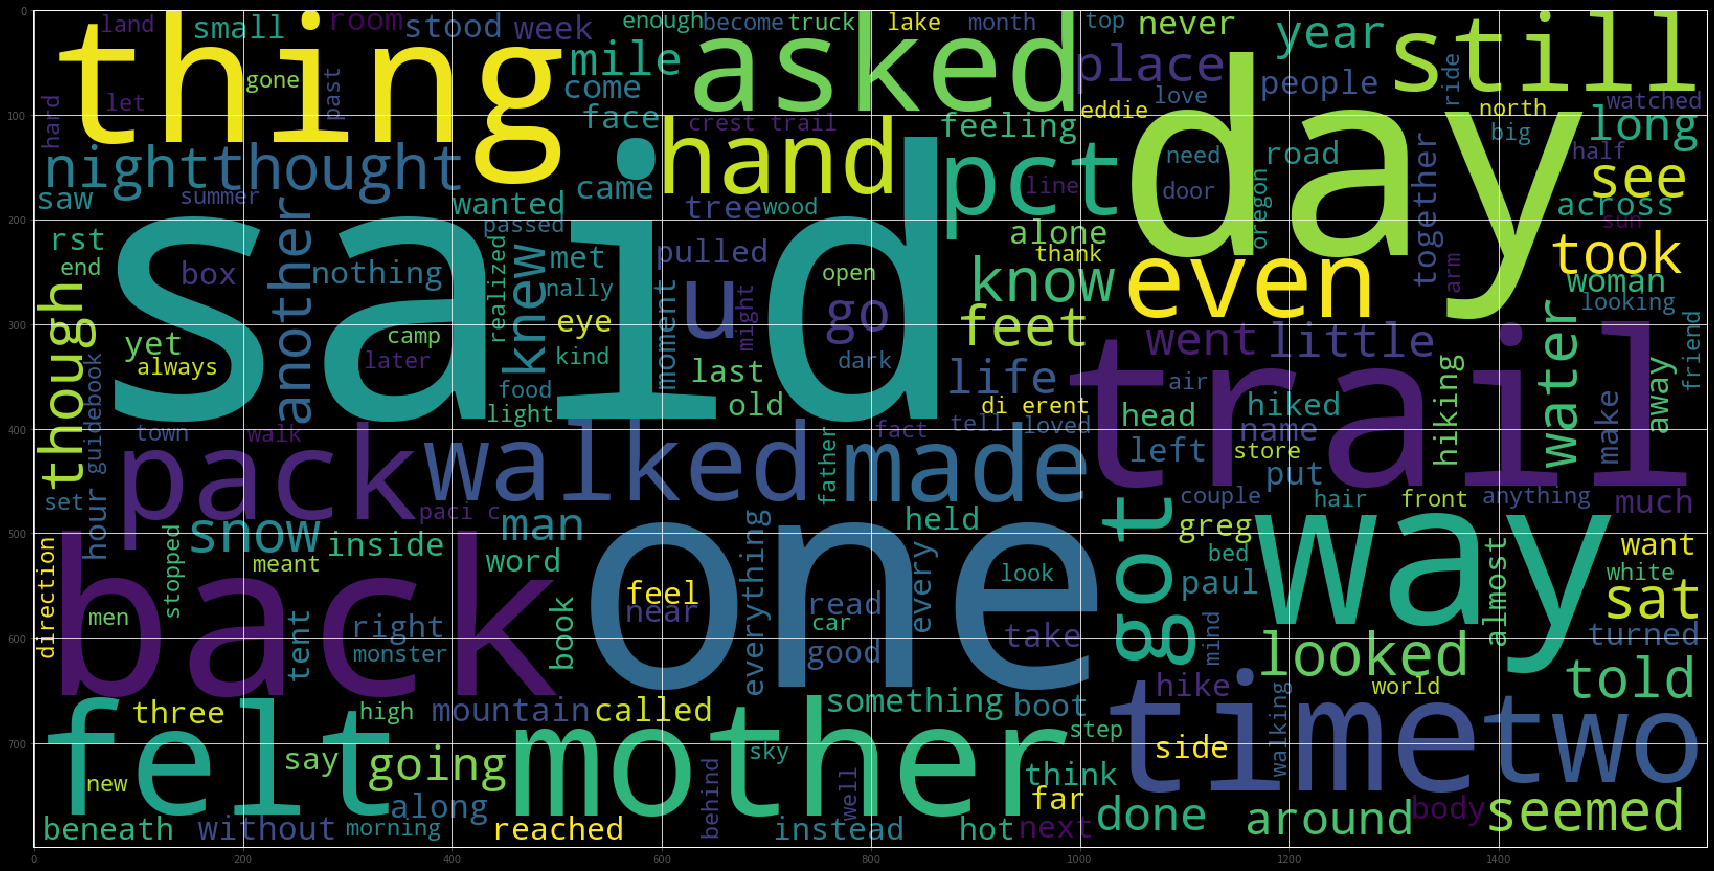

In [5]:
# Now let's create a word cloud! Take our nicely cleaned up data and plug in straight in.
def wordcloudIt(words):
    wordcloud = WordCloud(background_color="black", width=1600, height=800).generate(words)

    # Put into matplotlib(visualization library)
    plt.figure(figsize=(30,20), facecolor='k')
    plt.imshow(wordcloud)

wordcloudIt(stop_words)

In [28]:
# Let's use spacy to visualize different parts of speech now.

# Let's take the first sentence as an example.
doc=nlp(content_sentences[0])

# Show the first sentence.
options = {"distance": 110, "compact": "True", "color": "white", "bg": "#03045e", "font": "Times"}
displacy.render(doc, style="dep", options=options)

In [7]:
# Now that we've shown we can get different parts of speech, let's take a closer look at these.
"""
Potential tags used to describe parts of speech:
    ADJ: adjective, e.g. big, old, green, incomprehensible, first
    ADP: adposition, e.g. in, to, during
    ADV: adverb, e.g. very, tomorrow, down, where, there
    AUX: auxiliary, e.g. is, has (done), will (do), should (do)
    CONJ: conjunction, e.g. and, or, but
    CCONJ: coordinating conjunction, e.g. and, or, but
    DET: determiner, e.g. a, an, the
    INTJ: interjection, e.g. psst, ouch, bravo, hello
    NOUN: noun, e.g. girl, cat, tree, air, beauty
    NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
    PART: particle, e.g. ’s, not,
    PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
    PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
    PUNCT: punctuation, e.g. ., (, ), ?
    SCONJ: subordinating conjunction, e.g. if, while, that
    SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :)
    VERB: verb, e.g. run, runs, running, eat, ate, eating
    X: other, e.g. sfpksdpsxmsa
    SPACE: space, e.g.
"""

# Let's iterate through each sentence in the book, plug it into spacy, and use that to find the most frequently used parts of speech.
parsed_book = nlp(contents)

print(parsed_book[0].pos_)


PART


[book, journals, facts, people, book, memory, events, time, life, names, individuals, book, cases, details, order, anonymity, characters, events, book, people]


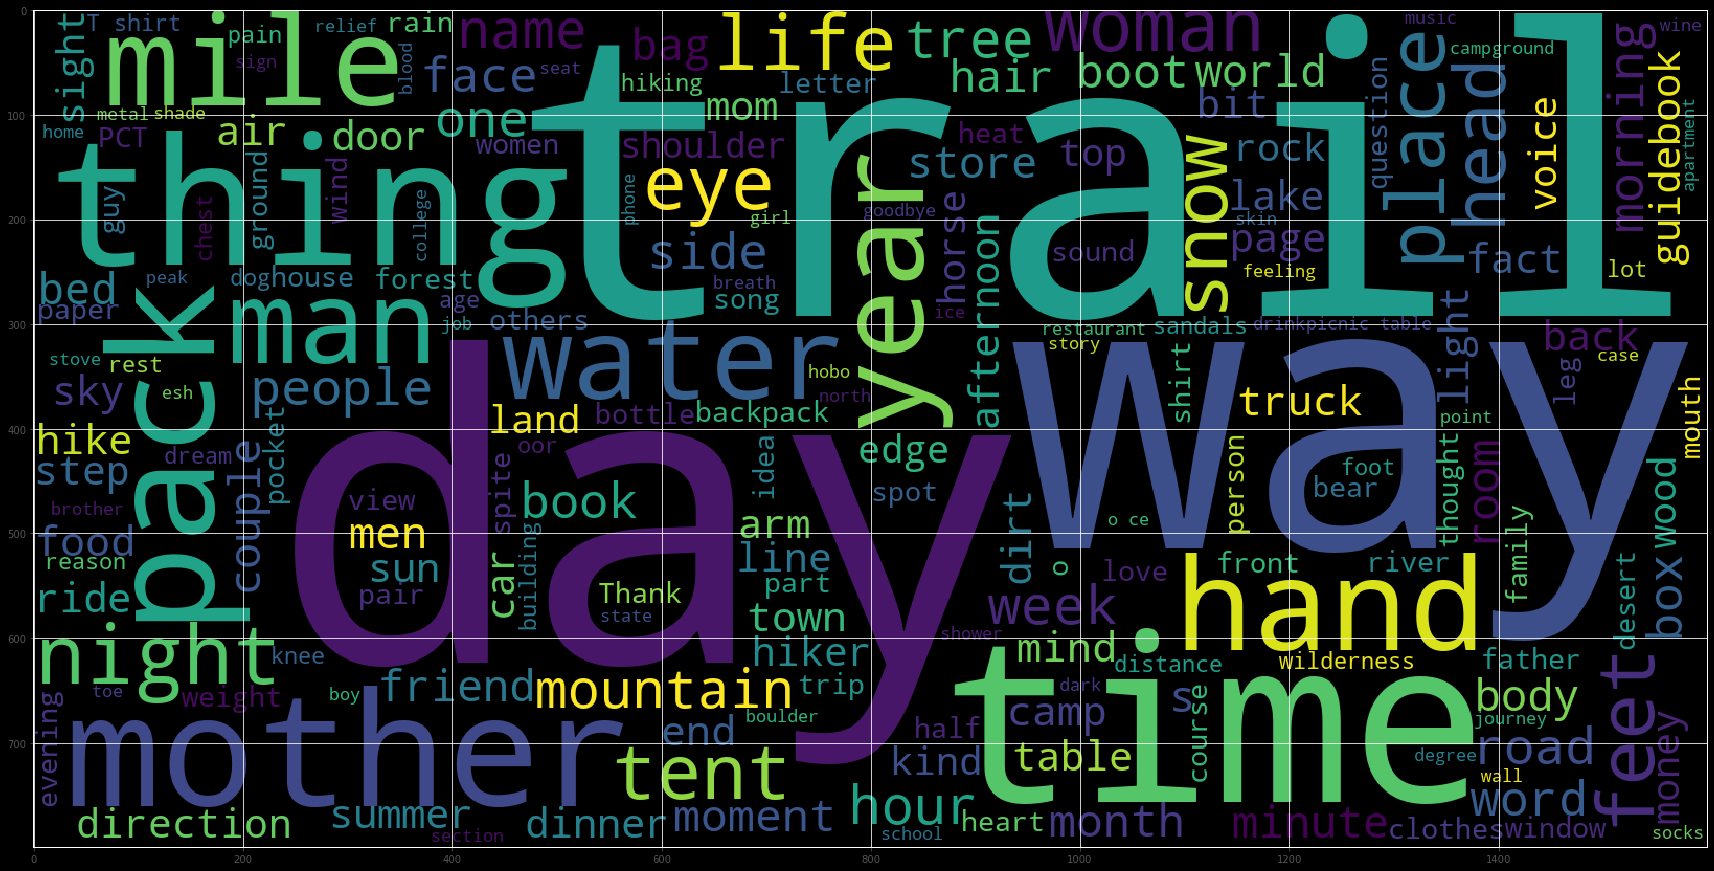

In [8]:
# Let's take the nouns
nouns = list(filter(lambda x: x.pos_ == "NOUN", parsed_book))

# Show first 20 nouns
print(nouns[:20])

# Now let's wordcloud it!
wordcloudIt(" ".join(list(map(lambda x: str(x), nouns))))

[write, relied, researched, consulted, appear, called, changed, modi!ed, identifying, preserve, omitted, had, was, standing, removed, fallen, catapulting, toppled, skittering, bounced]


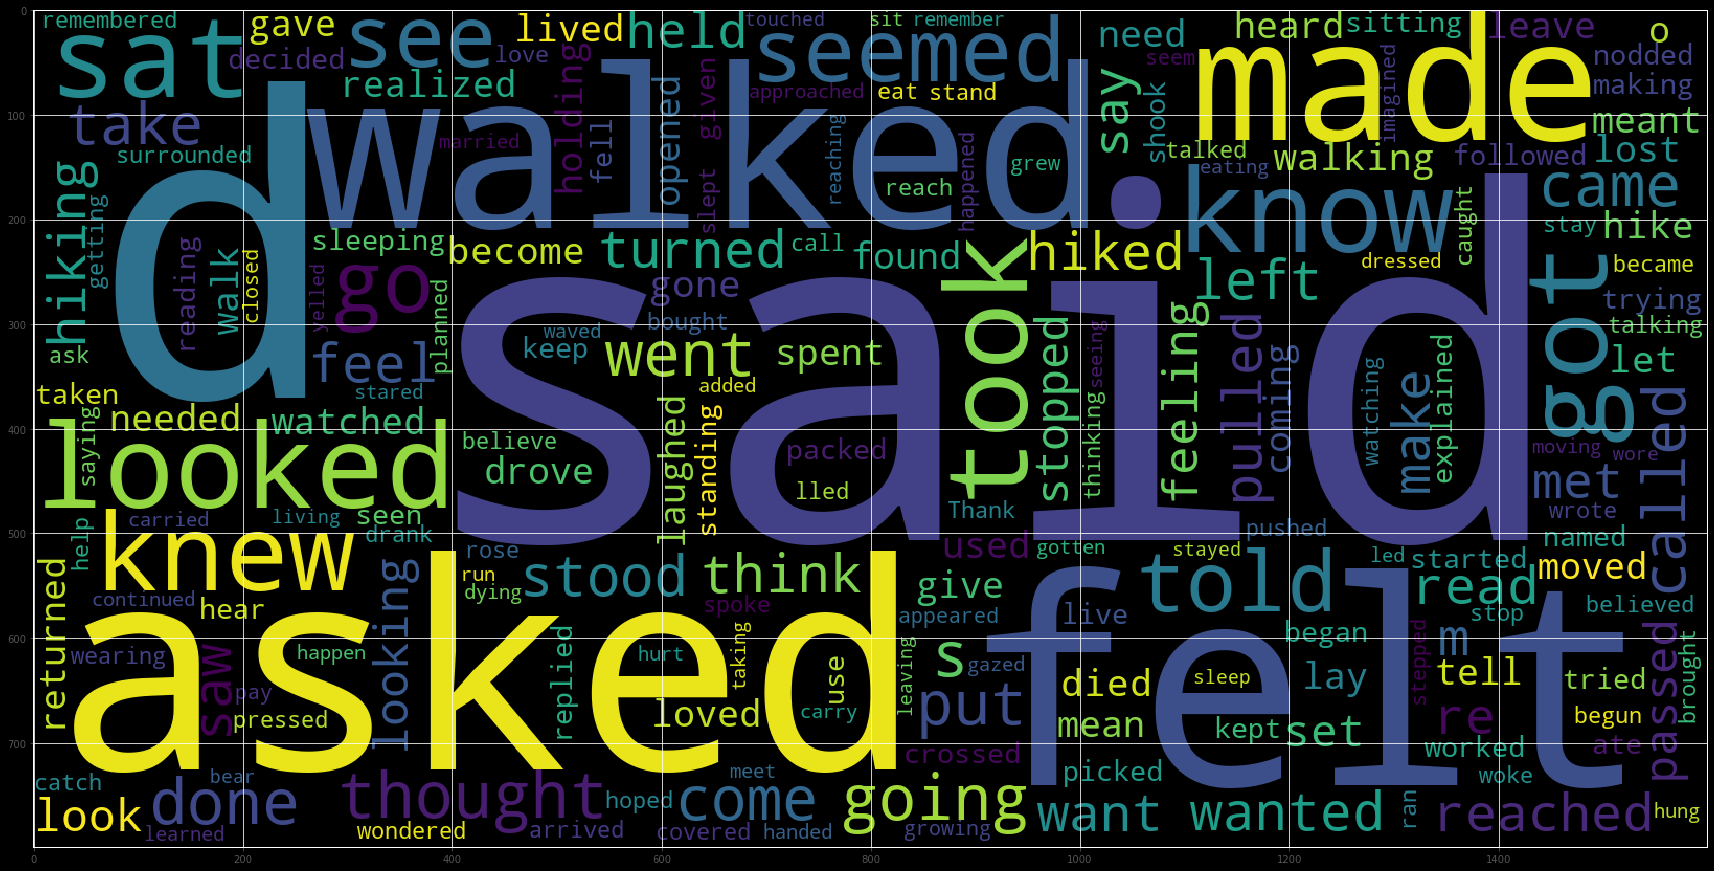

In [9]:
# Let's do the same thing for verbs!
verbs = list(filter(lambda x: x.pos_ == "VERB", parsed_book))

# Show first 20 verbs
print(verbs[:20])

# Now let's wordcloud it!
wordcloudIt(" ".join(list(map(lambda x: str(x), verbs))))

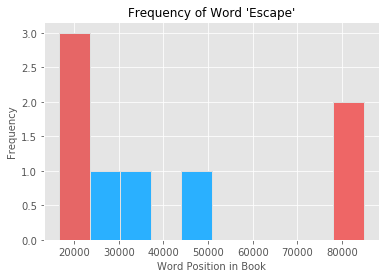

In [10]:
# Now let's oberve nouns like escape as a function over time in the book
parsed_book_with_count = { i:j for i,j in enumerate(parsed_book) }

# Now filter parsed_book_with_count by if noun == trail
trail_count = list(filter(lambda x: str(parsed_book_with_count[x]) == "escape", parsed_book_with_count))

# Styling up histogram
n, bins, patches = plt.hist(trail_count, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=1, alpha=1)

patches[-1].set_fc('#EE6666') # Set color
patches[-1].set_alpha(1) # Set opacity# Add annotation

patches[0].set_fc('#E66666') # Set color
patches[0].set_alpha(1) # Set opacity# Add annotation

plt.title('Frequency of Word \'Escape\'', fontsize=12)
plt.xlabel('Word Position in Book', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

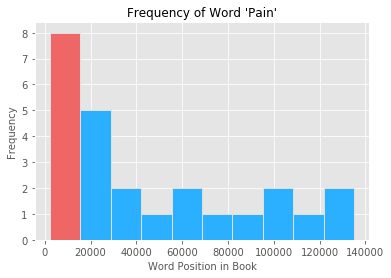

In [11]:
# Now let's oberve nouns like escape as a function over time in the book
parsed_book_with_count = { i:j for i,j in enumerate(parsed_book) }

# Now filter parsed_book_with_count by if noun == trail
trail_count = list(filter(lambda x: str(parsed_book_with_count[x]) == "pain", parsed_book_with_count))

# Styling up histogram
n, bins, patches = plt.hist(trail_count, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=1, alpha=1)

patches[0].set_fc('#EE6666') # Set color
patches[0].set_alpha(1) # Set opacity# Add annotation

plt.title('Frequency of Word \'Pain\'', fontsize=12)
plt.xlabel('Word Position in Book', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

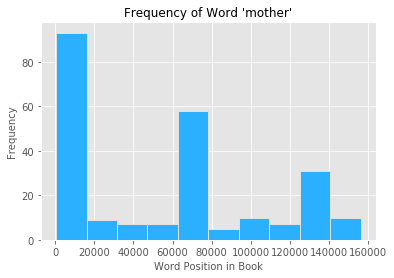

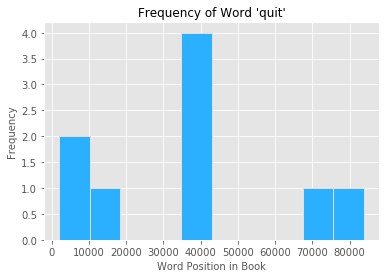

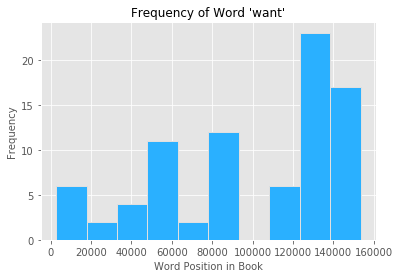

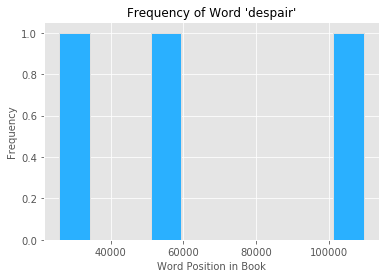

In [12]:
# Let's let the user pick what word they want to look at!
def plot_freq_word(word):
    # Now let's oberve nouns like escape as a function over time in the book
    parsed_book_with_count = { i:j for i,j in enumerate(parsed_book) }

    # Now filter parsed_book_with_count by if noun == trail
    trail_count = list(filter(lambda x: str(parsed_book_with_count[x]) == word, parsed_book_with_count))

    # Styling up histogram
    n, bins, patches = plt.hist(trail_count, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=1, alpha=1)

    plt.title(F'Frequency of Word \'{word}\'', fontsize=12)
    plt.xlabel('Word Position in Book', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.show()

user_inp = input("Enter a word, or q to quit: ")
while user_inp != "q":
    plot_freq_word(user_inp)
    user_inp = input("Enter a word, or q to quit: ")

In [13]:
# parsed_book[100000:120000]

# Repetition is a common technique used within _Wild_. Let's observe how we can see this within our data.

# Let's look at the frequency of nouns used.
nouns_to_text = [i.text for i in nouns]
nouns_used = set(nouns_to_text)
table_of_noun_freq = []
# Now find how many times each noun is used and place into a table
print("WORD        FREQUENCY")
for noun in nouns_used:
    # print(F"{str(noun).ljust(12)}{nouns.count(noun)}")
    table_of_noun_freq.append({
        "noun": str(noun),
        "count": nouns_to_text.count(noun)
    })

sorted_nouns = sorted(table_of_noun_freq, key=lambda x: x["count"], reverse=True)

# Display top 20 sorted nouns
for noun in sorted_nouns[:20]:
    print(F"{noun['noun'].ljust(12)}{noun['count']}")

WORD        FREQUENCY
trail       338
way         275
mother      237
time        225
day         220
pack        178
water       176
miles       163
things      154
man         147
feet        145
days        142
snow        140
night       132
life        123
box         117
thing       116
woman       110
place       107
head        104


In [14]:
# Let's do the same for verbs.

# Repetition is a common technique used within _Wild_. Let's observe how we can see this within our data.

# Let's look at the frequency of verbs used.
verbs_to_text = [i.text for i in verbs]
verbs_used = set(verbs_to_text)
table_of_verb_freq = []
# Now find how many times each noun is used and place into a table
print("WORD        FREQUENCY")
for verb in verbs_used:
    table_of_verb_freq.append({
        "verb": str(verb),
        "count": verbs_to_text.count(verb)
    })

sorted_verbs = sorted(table_of_verb_freq, key=lambda x: x["count"], reverse=True)

# Display top 20 sorted verbs
for verb in sorted_verbs[:20]:
    print(F"{verb['verb'].ljust(12)}{verb['count']}")

WORD        FREQUENCY
said        730
’d          552
was         499
had         434
be          375
been        264
asked       211
do          206
have        203
felt        199
walked      195
made        185
looked      165
sat         164
took        160
know        156
got         154
knew        151
seemed      147
go          146


Sentence: To write this book, I relied upon my personal journals, researched facts when I could, consulted with several of the people who appear in the book, and called upon my own memory of these events and this time of my life SCORE:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence:  I have changed the names of most but not all of the individuals in this book, and in some cases I also modi SCORE:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence: ed identifying details in order to preserve anonymity SCORE:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence:  There are no composite characters or events in this book SCORE:  {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
Sentence:  I occasionally omitted people and events, but only when that omission had no impact on either the veracity or the substance of the story SCORE:  {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.4215}
Sentence: PROLOGUE The trees were tall, but I w

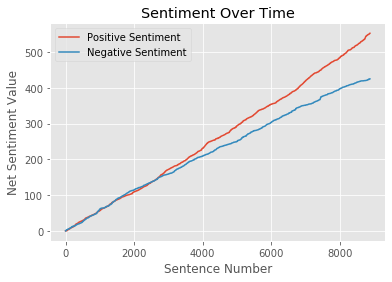

In [16]:
# So far we've been looking at the actual words. Now let's analyze the sentiment of those words.

# Let's use VADER(Valence Aware Dictionary and sEntiment Reasoner)
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Let's add up the net positive, neutral, negative, and not the compound score.
# Neg, Neu, and Pos range from 0-1, compound from -1 to 1
net_neg = 0
net_neu = 0
net_pos = 0

# Map the changes in positive and negative over time
map_change_neg = []
map_change_pos = []

# Go through each sentence + analyze sentiment(VADER isn't designed for long texts)
first_count = 0
for i in content_sentences:
    scores = sia.polarity_scores(i)
    # Print score of first 30 sentences
    if first_count < 20:
        print(F"Sentence: {i} SCORE: ", scores)
    net_neg += scores['neg']
    net_neu += scores['neu']
    net_pos += scores['pos']
    map_change_neg.append(net_neg)
    map_change_pos.append(net_pos)
    first_count += 1

print(F"RESULTS\n\tNEG: {net_neg}\n\tPOS: {net_pos}\n\tNEU: {net_neu}")

# Now look at the change of these scores over time.
pos_sent, = plt.plot(map_change_pos, label="Positive Sentiment")
neg_sent, = plt.plot(map_change_neg, label="Negative Sentiment")
plt.legend([pos_sent, neg_sent], ["Positive Sentiment", "Negative Sentiment"])

plt.xlabel("Sentence Number")
plt.ylabel("Net Sentiment Value")
plt.title("Sentiment Over Time")
plt.show()

In [26]:
# Let's perform TF-IDF(Term Frequency Inverse Document Frequency) for the nouns of this document.
# IDF = log(1 / (document frequency of word))
import math
number_of_words = len(nouns_to_text)
print(F"Length of document: {number_of_words} words.")

individual_words = set(nouns_to_text)
IDF = 0

important_words = []

for i in individual_words:
    important_words.append([i, math.log(1 / (nouns_to_text.count(i) / number_of_words))])

# Sort by highest scores + print out.
idf_scores = sorted(important_words, key=lambda x: x[1], reverse=True)

print("IDF SCORES\nNAME                SCORE")
for i in idf_scores[:100]:
    print(F"{i[0].ljust(20)}{round(i[1]*1000)/1000}")

Length of document: 22657 words.
IDF SCORES
NAME                SCORE
album               10.028
purposes            10.028
pinecones           10.028
glass-              10.028
singer              10.028
goodnight           10.028
sleeves             10.028
stare               10.028
situations          10.028
interview           10.028
forces              10.028
glimpsing           10.028
brawny              10.028
horn                10.028
bounce              10.028
awhirl              10.028
realest             10.028
quartet             10.028
locals              10.028
odor                10.028
importance          10.028
lamp                10.028
junipers            10.028
sunburns            10.028
horseshoe           10.028
extensions          10.028
neoprene            10.028
football            10.028
paperwork           10.028
fork                10.028
flaw                10.028
pencil              10.028
folly               10.028
diseases            10.028
motor       

In [27]:
# Let's perform TF-IDF(Term Frequency Inverse Document Frequency) for the text of this document.
# IDF = log(1 / (document frequency of word))
import math
number_of_words = len(contents_clean)
print(F"Length of document: {number_of_words} words.")

individual_words = set(contents_clean)
IDF = 0

important_words = []

for i in individual_words:
    important_words.append([i, math.log(1 / (contents_clean.count(i) / number_of_words))])

# Sort by highest scores + print out.
idf_scores = sorted(important_words, key=lambda x: x[1], reverse=True)

print("IDF SCORES\nNAME                SCORE")
for i in idf_scores[:100]:
    print(F"{i[0].ljust(20)}{round(i[1]*1000)/1000}")

Length of document: 132178 words.
IDF SCORES
NAME                SCORE
album               11.792
pinecones           11.792
Awakening           11.792
ourselves—names     11.792
slow-burning        11.792
generally           11.792
Sisters—South       11.792
disconnected        11.792
show;               11.792
forces              11.792
You’ve              11.792
tagging             11.792
!ll”                11.792
awhile              11.792
locals              11.792
jesting             11.792
direction—the       11.792
odor                11.792
junipers            11.792
sunburns            11.792
paperwork           11.792
east:               11.792
Shasta-             11.792
“Help               11.792
Utterly             11.792
motor               11.792
withJoe             11.792
sternum             11.792
touch;              11.792
Chances             11.792
repose              11.792
philosophical       11.792
damned              11.792
Reason              11.792
mu%ns      